# Week 5 Session Agenda 

## Pandas Familiarity Test

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#show all columns of a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations


What syntax do we use if we want to:

- Is this going to return a df or series? df["col_1"] : series
- Find the number of rows and columns? : df.shape
- get the data types for all columns : df.info() 
- get the min/max/quartiles info of the columns : df.describe()
- get the count of unique values of a column : df["col_1"].value_counts()
- get the sum of the entire column: df["col_1"].sum()
- get the sum of not the entire column, but sum of each of different subsets of the data: df.groupby("col_1")["col_2"].sum()
- get the number of unique values of a col: df["col_1"].nunique()
- get all the unique values of a col: df["col_1"].unique()
- multiply certain values of a column by *0.10: df["col_2"] = df["col_1"].apply(some_function)
- change a column from string to float: df["col_1"].astype()
- create a dataframe from series: df_new = pd.DataFrame(series_a)
- filter a dataframe: df[df["col_1"] > 4.5]
- sort values of a dataframe/series: df.sort_values(by = "col_1", ascending = True/False) / series_a.sort_values(...)
- make consective row index of dataframe: df.reset_index(drop = True, inplace = True) or df = df.reset_index(drop = True)

In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("iris")
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10000,3.50000,1.40000,0.20000,setosa
1,4.90000,3.00000,1.40000,0.20000,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#astype accepts "int", "float", "string".
df["sepal_length"] = df["sepal_length"].astype('string')
df["sepal_length"] = df["sepal_length"].astype('float')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10000,3.50000,1.40000,0.20000,setosa
1,4.90000,3.00000,1.40000,0.20000,setosa


In [5]:
def add_ten_percent(y):
    if y > 4.5:  
        return y*1.10
    else:
        return y

df["new_sepal_length"] = df["sepal_length"].apply(add_ten_percent)
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species,new_sepal_length
0,5.10000,3.50000,1.40000,0.20000,setosa,5.61000
1,4.90000,3.00000,1.40000,0.20000,setosa,5.39000
2,4.70000,3.20000,1.30000,0.20000,setosa,5.17000
3,4.60000,3.10000,1.50000,0.20000,setosa,5.06000
4,5.00000,3.60000,1.40000,0.20000,setosa,5.50000
5,5.40000,3.90000,1.70000,0.40000,setosa,5.94000
6,4.60000,3.40000,1.40000,0.30000,setosa,5.06000
7,5.00000,3.40000,1.50000,0.20000,setosa,5.50000
8,4.40000,2.90000,1.40000,0.20000,setosa,4.40000
9,4.90000,3.10000,1.50000,0.10000,setosa,5.39000


In [6]:
df["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length      150 non-null    float64
 1   sepal_width       150 non-null    float64
 2   petal_length      150 non-null    float64
 3   petal_width       150 non-null    float64
 4   species           150 non-null    object 
 5   new_sepal_length  150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [8]:
df.reset_index(drop = False, inplace = True)
df.head(2)

,index,sepal_length,sepal_width,petal_length,petal_width,species,new_sepal_length
0,0,5.10000,3.50000,1.40000,0.20000,setosa,5.61000
1,1,4.90000,3.00000,1.40000,0.20000,setosa,5.39000


In [9]:
ser_a = df.groupby("species")["sepal_length"].mean().sort_values(ascending = False).reset_index(drop = False)
df_a = pd.DataFrame(ser_a)
df_a

,species,sepal_length
0,virginica,6.58800
1,versicolor,5.93600
2,setosa,5.00600


In [10]:
ser_a = df.groupby("species")["sepal_length"].mean().sort_values(ascending = False)
ser_a.index.tolist()

['virginica', 'versicolor', 'setosa']

## Seaborn Familiarity Test

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

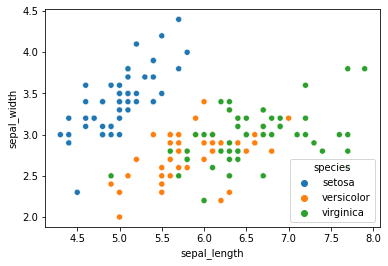

In [11]:
#hue is typically a categorical variable. x refers to horizontal axis, y refers to vertical axis.
sns.scatterplot(x = "sepal_length", y = "sepal_width", hue = "species", data = df)

In [12]:
df_exercise = sns.load_dataset("exercise")
df_exercise.head(2)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


In [13]:
df_exercise["time"].value_counts()

1 min     30
15 min    30
30 min    30
Name: time, dtype: int64

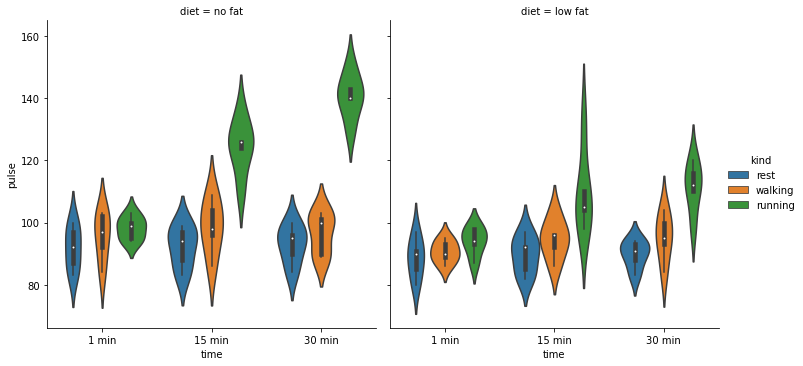

In [14]:
#notice we consider time as a categorical variable
# refer here to see various values accepted within the kind argument. In this case we use "violin"
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", kind="violin", data=df_exercise)